In [1]:
# WeatherPy 

In [2]:
# Import dependencies
import json
import requests
import random
import pandas as pd
import numpy as np
import time
from citipy import citipy
import openweathermapy.core as owm
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

# Import Open Weather Map api key
from owm_config import owm_key

In [3]:
# Create empty df to hold city and country data
cities_df = pd.DataFrame()
cities_df["City"] = ""
cities_df["Country"] = ""
# Randomly generate lat and lng 
cities_df["Latitude"] = [np.random.uniform(-90, 90) for x in range(1500)]
cities_df["Longitude"] = [np.random.uniform(-180, 180) for x in range(1500)]
# Use latitude and longitude with interrows and citipy to find cities/countries
for index, row in cities_df.iterrows():
    lat = row["Latitude"]
    lng = row["Longitude"]
    cities_df.set_value(index, "City", citipy.nearest_city(lat, lng).city_name)
    cities_df.set_value(index, "Country", citipy.nearest_city(lat, lng).country_code)
# Delete any possible duplicate cities and reset index
cities_df = cities_df.drop_duplicates(["City", "Country"])
cities_df = cities_df.reset_index()
# Update df to show city and country only
# Exercise calls for a minimum of 500 cities, so let's loop through 600 cities 
cities_df = cities_df[["City", "Country"]]
cities_df = cities_df.iloc[:600]
cities_df

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


,City,Country
0,provideniya,ru
1,okha,ru
2,rikitea,pf
3,vardo,no
4,punta arenas,cl
5,banda aceh,id
6,villa corzo,mx
7,north bend,us
8,pangyan,ph
9,vaini,to


In [4]:
# Perform API calls and display results in Data Frame
cities_df["Cloudiness"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["Max Temperature"] = ""
cities_df["Wind Speed"] = ""

# Create row counter and set it to one
row_counter = 1
# Create a dictionary with parameters
settings = {"appid": owm_key, "units": "imperial"}
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# Create query url
query_url = f"{base_url}appid={settings['appid']}&units={settings['units']}&q="

print("---------------------------")
print("Finding cities ... ")
print("---------------------------")
# Iterrows in to loop city row in query url
for index, row in cities_df.iterrows():
    try:
        cities_response = requests.get(query_url + row["City"] + "," + row["Country"])
        print(f"Processing Record {row_counter} | {row['City']}, {row['Country']}")
        print(cities_response.url)
        # Update row counter
        row_counter += 1
    
        # Turn cities response into json with owm module
        cities_response = owm.get_current(row["City"], **settings)
    
        # Create summary variables to retrieve certain data from cities response
        lat_summary = ["coord.lat"]
        lon_summary = ["coord.lon"]
        temp_summary = ["main.temp_max"]
        humidity_summary = ["main.humidity"]
        cloud_summary = ["clouds.all"]
        wind_summary = ["wind.speed"]
        date_summary = ["dt"]
    
        # Add retrieved data into cities_df data frame
        cities_df.set_value(index, "Cloudiness", cities_response(*cloud_summary))
        cities_df.set_value(index, "Date", cities_response(*date_summary))
        cities_df.set_value(index, "Humidity", cities_response(*humidity_summary))
        cities_df.set_value(index, "Latitude", cities_response(*lat_summary))
        cities_df.set_value(index, "Longitude", cities_response(*lon_summary))
        cities_df.set_value(index, "Max Temperature", cities_response(*temp_summary))
        cities_df.set_value(index, "Wind Speed", cities_response(*wind_summary))
    except:
        print(f"**Weather data does not exist for {row['City']}, {row['Country']}**")
        continue
    
print("---------------------------")
print("600 cities found")
print("---------------------------")

---------------------------
Finding cities ... 
---------------------------
Processing Record 1 | provideniya, ru
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=provideniya,ru


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_l

Processing Record 2 | okha, ru
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=okha,ru
Processing Record 3 | rikitea, pf
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=rikitea,pf
Processing Record 4 | vardo, no
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=vardo,no
Processing Record 5 | punta arenas, cl
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=punta%20arenas,cl
Processing Record 6 | banda aceh, id
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=banda%20aceh,id
Processing Record 7 | villa corzo, mx
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=villa%20corzo,mx
Processing Record 8 | north bend, us
http://api.openweathermap.org/data/2.5/weather?appid=bf

Processing Record 55 | thompson, ca
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=thompson,ca
Processing Record 56 | tsumeb, na
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=tsumeb,na
Processing Record 57 | tuatapere, nz
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=tuatapere,nz
Processing Record 58 | bredasdorp, za
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=bredasdorp,za
Processing Record 59 | mangrol, in
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=mangrol,in
Processing Record 60 | cayenne, gf
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=cayenne,gf
Processing Record 61 | slave lake, ca
http://api.openweathermap.org/data/2.5/weather?appid=bf93e

Processing Record 107 | faanui, pf
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=faanui,pf
Processing Record 108 | imbituba, br
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=imbituba,br
Processing Record 109 | idlib, sy
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=idlib,sy
Processing Record 110 | opobo, ng
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=opobo,ng
**Weather data does not exist for opobo, ng**
Processing Record 111 | san quintin, mx
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=san%20quintin,mx
Processing Record 112 | poum, nc
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=poum,nc
Processing Record 113 | kalanchak, ua
http://api.openweath

Processing Record 160 | saint-philippe, re
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=saint-philippe,re
Processing Record 161 | kushima, jp
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=kushima,jp
Processing Record 162 | yar-sale, ru
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=yar-sale,ru
Processing Record 163 | zyryanka, ru
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=zyryanka,ru
Processing Record 164 | swan river, ca
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=swan%20river,ca
Processing Record 165 | waitati, nz
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=waitati,nz
Processing Record 166 | kapaa, us
http://api.openweathermap.org/data/2.5/w

Processing Record 210 | molchanovo, ru
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=molchanovo,ru
Processing Record 211 | basco, ph
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=basco,ph
Processing Record 212 | moville, ie
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=moville,ie
Processing Record 213 | ilebo, cd
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=ilebo,cd
Processing Record 214 | ushtobe, kz
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=ushtobe,kz
Processing Record 215 | mitu, co
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=mitu,co
Processing Record 216 | manggar, id
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034d

Processing Record 262 | thai binh, vn
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=thai%20binh,vn
Processing Record 263 | rawson, ar
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=rawson,ar
Processing Record 264 | vancouver, ca
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=vancouver,ca
Processing Record 265 | nguiu, au
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=nguiu,au
**Weather data does not exist for nguiu, au**
Processing Record 266 | sharjah, ae
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=sharjah,ae
Processing Record 267 | lehigh acres, us
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=lehigh%20acres,us
Processing Record 268 | college, us
ht

Processing Record 315 | yenagoa, ng
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=yenagoa,ng
Processing Record 316 | masumbwe, tz
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=masumbwe,tz
Processing Record 317 | san cristobal, ec
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=san%20cristobal,ec
Processing Record 318 | ayan, ru
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=ayan,ru
Processing Record 319 | gigmoto, ph
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=gigmoto,ph
Processing Record 320 | port hardy, ca
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=port%20hardy,ca
Processing Record 321 | tokoroa, nz
http://api.openweathermap.org/data/2.5/weather

Processing Record 368 | heihe, cn
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=heihe,cn
Processing Record 369 | hami, cn
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=hami,cn
Processing Record 370 | tsabong, bw
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=tsabong,bw
Processing Record 371 | cabedelo, br
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=cabedelo,br
Processing Record 372 | ulverstone, au
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=ulverstone,au
Processing Record 373 | arlit, ne
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=arlit,ne
Processing Record 374 | batemans bay, au
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac

Processing Record 420 | borovichi, ru
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=borovichi,ru
Processing Record 421 | florianopolis, br
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=florianopolis,br
Processing Record 422 | nemuro, jp
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=nemuro,jp
Processing Record 423 | ritchie, za
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=ritchie,za
Processing Record 424 | pingdu, cn
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=pingdu,cn
Processing Record 425 | fort nelson, ca
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=fort%20nelson,ca
Processing Record 426 | spoleto, it
http://api.openweathermap.org/data/2.5/wea

Processing Record 472 | zainsk, ru
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=zainsk,ru
Processing Record 473 | pareora, nz
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=pareora,nz
Processing Record 474 | ilulissat, gl
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=ilulissat,gl
Processing Record 475 | quatre cocos, mu
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=quatre%20cocos,mu
Processing Record 476 | karratha, au
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=karratha,au
Processing Record 477 | raga, sd
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=raga,sd
**Weather data does not exist for raga, sd**
Processing Record 478 | changli, cn
http://ap

Processing Record 525 | tocopilla, cl
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=tocopilla,cl
Processing Record 526 | kutum, sd
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=kutum,sd
Processing Record 527 | maneadero, mx
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=maneadero,mx
**Weather data does not exist for maneadero, mx**
Processing Record 528 | la grande, us
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=la%20grande,us
Processing Record 529 | victor rosales, mx
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=victor%20rosales,mx
**Weather data does not exist for victor rosales, mx**
Processing Record 530 | bull savanna, jm
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700a

Processing Record 577 | luz, pt
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=luz,pt
Processing Record 578 | grand gaube, mu
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=grand%20gaube,mu
Processing Record 579 | san antonio, cl
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=san%20antonio,cl
Processing Record 580 | dolores, ar
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=dolores,ar
Processing Record 581 | adre, td
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=adre,td
Processing Record 582 | tabuk, sa
http://api.openweathermap.org/data/2.5/weather?appid=bf93e30856ac902034dc8700abb3b591&units=imperial&q=tabuk,sa
Processing Record 583 | golfito, cr
http://api.openweathermap.org/data/2.5/weather?appid=bf93e3085

In [5]:
# Print the df to check for even distribution of cities across globe
cities_df

,City,Country,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,provideniya,ru,44,1553392092,100,64.42,-173.23,22.08,23.73
1,okha,ru,48,1553392357,86,53.59,142.95,17.4,18.48
2,rikitea,pf,80,1553391749,99,-23.12,-134.97,79.14,18.25
3,vardo,no,1,1553392048,31,39.62,-77.74,46.4,8.05
4,punta arenas,cl,75,1553391787,76,-53.16,-70.91,53.6,9.17
5,banda aceh,id,20,1553392056,69,5.56,95.32,85.26,2.93
6,villa corzo,mx,5,1553388420,61,16.19,-93.27,80.6,18.34
7,north bend,us,20,1553392215,71,43.41,-124.22,53.6,6.93
8,pangyan,ph,20,1553389200,51,5.7,125.28,86,9.17
9,vaini,to,0,1553389200,59,15.34,74.49,66.2,1.7


In [6]:
# Save a csv of all city data retrieved
cities_df.to_csv("cities_data.csv")

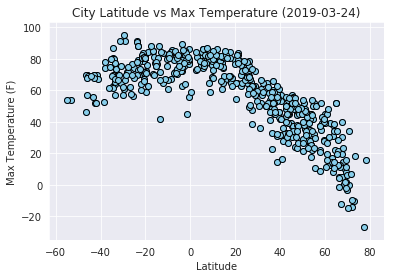

In [17]:
# Create scatter plot to show Temperature (F) vs. Latitude
timestamp = cities_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

Latitude = pd.to_numeric(cities_df["Latitude"])
Temperature = pd.to_numeric(cities_df["Max Temperature"])

with sns.axes_style("darkgrid"):
    sns.regplot(data=cities_df, x=Latitude, y=Temperature, fit_reg=False)
plt.title(f"City Latitude vs Max Temperature ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(x=Latitude, y=Temperature, color="skyblue", alpha=1, edgecolor="black")
# Save png of Temperature (F) vs. Latitude scatter plot 
plt.savefig("temp_v_lat.png")
plt.show()

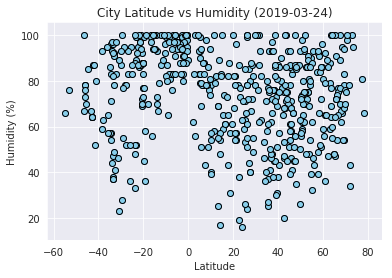

In [18]:
# Create scatter plot to show Humidity (%) vs. Latitude
Humidity = pd.to_numeric(cities_df["Humidity"])

with sns.axes_style("darkgrid"):
    sns.regplot(data=cities_df, x=Latitude, y=Humidity, fit_reg=False)
plt.title(f"City Latitude vs Humidity ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x=Latitude, y=Humidity, color="skyblue", alpha=1, edgecolor="black")
plt.savefig("hum_v_lat.png")
plt.show()

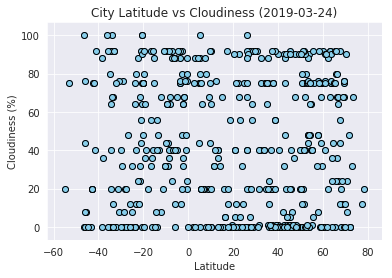

In [19]:
# Create scatter plot to show Cloudiness (%) vs. Latitude
Cloudiness = pd.to_numeric(cities_df["Cloudiness"])

with sns.axes_style("darkgrid"):
    sns.regplot(data=cities_df, x=Latitude, y=Cloudiness, fit_reg=False)
plt.title(f"City Latitude vs Cloudiness ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x=Latitude, y=Cloudiness, color="skyblue", alpha=1, edgecolor="black")
plt.savefig("cloud_v_lat")
plt.show()

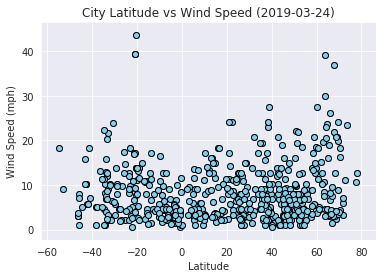

In [20]:
# Create a scatter plot that shows Wind Speed (mph) vs. Latitude
Windspeed = pd.to_numeric(cities_df["Wind Speed"])

with sns.axes_style("darkgrid"):
    sns.regplot(data=cities_df, x=Latitude, y=Windspeed, fit_reg=False)
plt.title(f"City Latitude vs Wind Speed ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x=Latitude, y=Windspeed, color="skyblue", alpha=1, edgecolor="black")
plt.savefig("wind_v_lat.png")
plt.show()